In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("students.csv")

x, y = np.array(df.iloc[::,0]).reshape(-1, 1), np.array(df.iloc[::,1]).reshape(-1, 1)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,4.8,75
4,3.5,30


<AxesSubplot: xlabel='Hours', ylabel='Scores'>

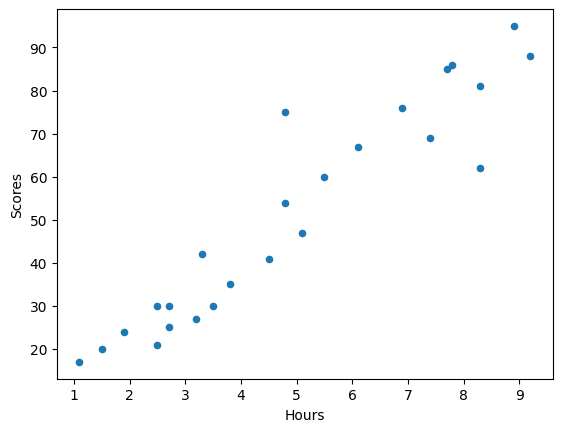

In [2]:
df.plot(x='Hours', y='Scores', kind='scatter')

In [3]:
model_l = LinearRegression()
model_l.fit(x, y)

LinearRegression()

In [4]:
df['y_pred'] = model_l.predict(x)

In [5]:
mae = mean_absolute_error(y, df['y_pred'])
mse = mean_squared_error(y, df['y_pred'])
rmse = np.sqrt(mse)

print(f'intercept_b0: { "% 0.2f" % model_l.intercept_}', f'coef_b_n: { "% 0.2f" % model_l.coef_}', f'score: { "% 0.2f" % model_l.score(x, y)}', sep='\n')
print('\n')
print(f'mae : { "% 0.2f" % mae}', f'mse : { "% 0.2f" % mse}', f'rmse: { "% 0.2f" % rmse}', sep='\n')

intercept_b0:  4.33
coef_b_n:  9.51
score:  0.89


mae :  6.22
mse :  68.48
rmse:  8.28


--------------------------

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

train_test_index = []

cnt = 1
for train_index, test_index in kf.split(x, y):
    train_test_index.append((train_index, test_index))
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 20, Test set:5
Fold:2, Train set: 20, Test set:5
Fold:3, Train set: 20, Test set:5
Fold:4, Train set: 20, Test set:5
Fold:5, Train set: 20, Test set:5


In [8]:
scores = cross_val_score(LinearRegression(), x, y, cv=kf, scoring='neg_mean_squared_error')

num = 0
for i in scores:
    print(num, 'score: %0.3f' % -i)
    num += 1
    
print('rmse : %0.3f' %  np.sqrt(-scores.mean()))
print('best_score : %0.3f' %  min(-scores))

0 score: 136.028
1 score: 27.833
2 score: 173.390
3 score: 27.905
4 score: 25.074
rmse : 8.834
best_score : 25.074


In [14]:
df['Hours'][train_test_index[4][0]].head()

0    2.5
1    5.1
2    3.2
3    4.8
4    3.5
Name: Hours, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = df['Hours'][train_test_index[4][0]], df['Hours'][train_test_index[4][1]], df['Scores'][train_test_index[4][0]], df['Scores'][train_test_index[4][1]]
x_train, x_test, y_train, y_test = x_train.values.reshape(-1, 1), x_test.values.reshape(-1, 1), y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)

LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = LinReg.predict(x_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'intercept_b0: { "% 0.2f" % LinReg.intercept_}', f'coef_b_n: { "% 0.2f" % LinReg.coef_}', f'score: { "% 0.2f" % LinReg.score(x_test, y_test)}', sep='\n')
print('\n')
print(f'mae : { "% 0.2f" % mae}', f'mse : { "% 0.2f" % mse}', f'rmse: { "% 0.2f" % rmse}', sep='\n')

intercept_b0:  3.46
coef_b_n:  9.65
score:  0.96


mae :  4.75
mse :  25.07
rmse:  5.01


In [155]:
y_test

array([[88],
       [60],
       [85],
       [17],
       [69]], dtype=int64)

In [156]:
y_pred

array([[92.27675724],
       [56.55750492],
       [77.79597927],
       [14.08055622],
       [74.89982368]])

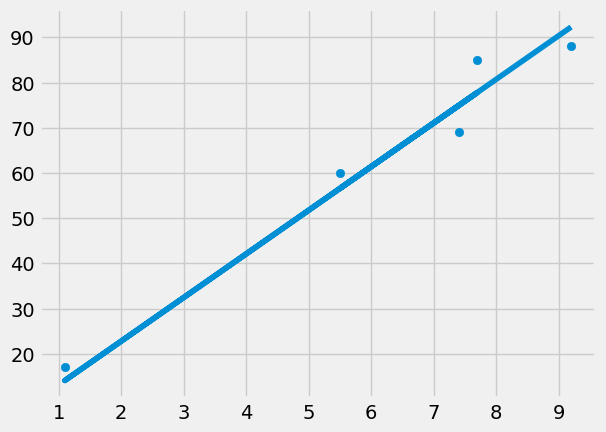

In [157]:
plt.style.use('fivethirtyeight')
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)